# Jothika R
# jothika.r20@gmail.com

#                                              RESOULTE AI - INTERNSHIP

#                                                 Clustering -  Assignment

In [2]:
#importing required  the libraries
import pandas as pd 
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [17]:
data = pd.read_csv("Online Retail.csv")

In [18]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


# Data Cleaning

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [21]:
data.shape

(541909, 8)

In [22]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [23]:
data = data.dropna()

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [26]:
data.shape

(406829, 8)

# data Preprocessing

In [28]:
data['CustomeID'] = data['CustomerID'].astype(str)
data['Amount'] = data['Quantity']*data['UnitPrice']
rfm_data_m = data.groupby('CustomerID')['Amount'].sum()
rfm_data_m.reset_index()
rfm_data_m.columns = ['CustomerID','Amount']
rfm_data_m

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2094.88
18287.0    1837.28
Name: Amount, Length: 4372, dtype: float64

In [29]:
rfm_data_f = data.groupby("CustomerID")['InvoiceDate'].count()
rfm_data_f = rfm_data_f.reset_index()
rfm_data_f.columns = ['CustomerID','Frequency']
rfm_data_f

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [34]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'],format='%m/%d/%y %H:%M')
max_data= max(data['InvoiceDate'])
data['diff'] = max_data-data['InvoiceDate']
rfm_data_p = data.groupby('CustomerID')['diff'].min()
rfm_data_p = rfm_data_p.reset_index()
rfm_data_p.columns = ['CustomerID','diff']
rfm_data_p['diff']=rfm_data_p['diff'].dt.days
rfm_data_p

,CustomerID,diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4367,18280.0,277
4368,18281.0,180
4369,18282.0,7
4370,18283.0,3


In [38]:
rfm_model=pd.merge(rfm_data_m,rfm_data_f,on = 'CustomerID',how='inner')
rfm_model = pd.merge(rfm_model,rfm_data_p,on = 'CustomerID',how='inner')
rfm_model.columns = ['CustomerID','Amount','Frequency','Recency']
rfm_model

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
...,...,...,...,...
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7
4370,18283.0,2094.88,756,3


In [41]:
q1 = rfm_model.Amount.quantile(0.05)
q3 = rfm_model.Amount.quantile(0.95)
iqr = q3-q1
rfm_model = rfm_model[(rfm_model.Amount>=q1-1.5*iqr)&(rfm_model.Amount<=q3+1.5*iqr)]

q1 = rfm_model.Recency.quantile(0.05)
q3 = rfm_model.Recency.quantile(0.95)
iqr = q3-q1
rfm_model = rfm_model[(rfm_model.Recency>=q1-1.5*iqr)&(rfm_model.Recency<=q3+1.5*iqr)]

q1 = rfm_model.Frequency.quantile(0.05)
q3 = rfm_model.Frequency.quantile(0.95)
iqr = q3-q1
rfm_model = rfm_model[(rfm_model.Frequency>=q1-1.5*iqr)&(rfm_model.Frequency<=q3+1.5*iqr)]

                      

In [44]:
rfm_model.shape

(4293, 4)

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
X = rfm_model[['Amount','Frequency','Recency']]
scaler = MinMaxScaler()
rfm_scale = scaler.fit_transform(X)
 

In [50]:
rfm_scale=pd.DataFrame(rfm_scale)
rfm_scale.columns = ['Amount','Frequency','Recency']
rfm_scale.head()

,Amount,Frequency,Recency
0,0.238663,0.001395,0.871314
1,0.478571,0.252441,0.002681
2,0.338703,0.041841,0.198391
3,0.336494,0.100418,0.048257
4,0.257277,0.022315,0.828418


In [59]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Kmean Custer Model

In [60]:
kmeans =KMeans(n_clusters=3,max_iter = 50)
kmeans.fit(rfm_scale)
lbs = kmeans.labels_
print(lbs)

[0 2 1 ... 0 1 1]


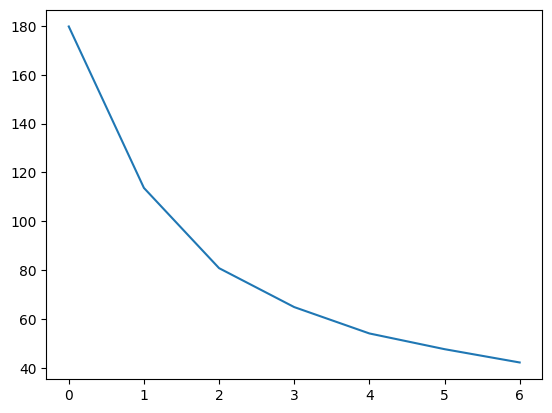

In [61]:
#wcss ,
wss = []
range_cluster = [2,3,4,5,6,7,8]
for i in range_cluster:
    kmeans = KMeans(n_clusters = i,max_iter = 50 )
    kmeans.fit(rfm_scale)
    wss.append(kmeans.inertia_)
plt.plot(wss)

In [63]:

range_cluster = [2,3,4,5,6,7,8]
for i in range_cluster:
    kmeans = KMeans(n_clusters = i,max_iter = 50 )
    kmeans.fit(rfm_scale)
    cluster_label = kmeans.labels_
    silhouette = silhouette_score(rfm_scale,cluster_label)
    print("n_clusters = {0}, the silhouette score is {1}".format(i,silhouette))

n_clusters = 2, the silhouette score is 0.5889064222823147
n_clusters = 3, the silhouette score is 0.5489370253660052
n_clusters = 4, the silhouette score is 0.5038222293825055
n_clusters = 5, the silhouette score is 0.4482408170286267
n_clusters = 6, the silhouette score is 0.4040369658704452
n_clusters = 7, the silhouette score is 0.385919978569806
n_clusters = 8, the silhouette score is 0.3794616844921837


In [64]:
rfm_model['ClusterID']=lbs
rfm_model

,CustomerID,Amount,Frequency,Recency,ClusterID
0,12346.0,0.00,2,325,0
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,0
...,...,...,...,...,...
4366,18278.0,173.90,9,73,1
4367,18280.0,180.60,10,277,0
4368,18281.0,80.82,7,180,0
4369,18282.0,176.60,13,7,1


<AxesSubplot: xlabel='ClusterID', ylabel='Amount'>

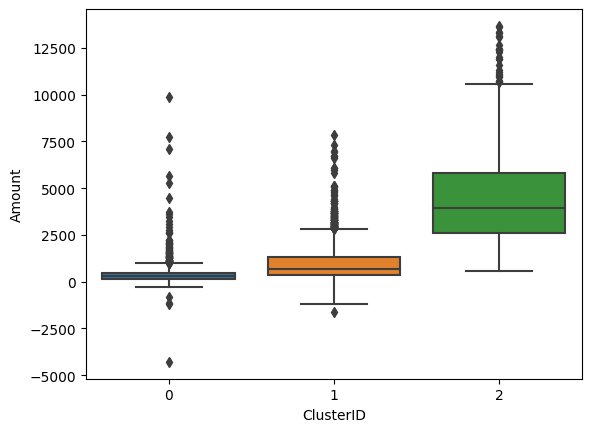

In [65]:
sns.boxplot(x='ClusterID',y = 'Amount',data = rfm_model)

<AxesSubplot: xlabel='ClusterID', ylabel='Frequency'>

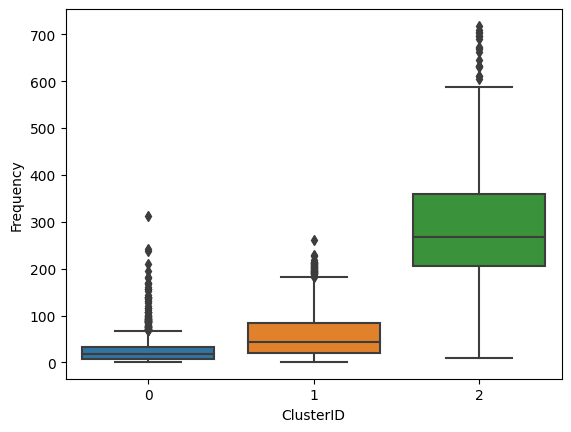

In [66]:
sns.boxplot(x='ClusterID',y = 'Frequency',data = rfm_model)

<AxesSubplot: xlabel='ClusterID', ylabel='Recency'>

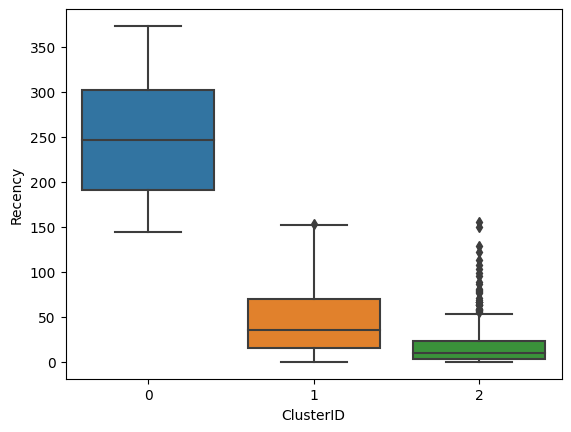

In [67]:
sns.boxplot(x='ClusterID',y = 'Recency',data = rfm_model)

In [ ]:
plt.scatter(rfm_model)